In [5]:
from QuadTree import Point, QTNode, QuadTree
from test_gen import file_to_points
from time import perf_counter
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
def list_tuples_to_points(points):
    arr = []
    for point in points:
        arr.append(Point(point[0], point[1]))
    return arr

def list_points_to_tuples(points):
    arr = []
    for point in points:
        arr.append((point.x, point.y))
    return arr

In [8]:
linear = file_to_points('test_collections\\linear.json')
square = file_to_points('test_collections\\square.json')
square_diagonal = file_to_points('test_collections\\square_diagonal.json')
random_1e2 = file_to_points('test_collections\\random_1e2.json')
random_1e3 = file_to_points('test_collections\\random_1e3.json')
random_1e4 = file_to_points('test_collections\\random_1e4.json')
random_1e5 = file_to_points('test_collections\\random_1e5.json')
random_1e6 = file_to_points('test_collections\\random_1e6.json')

collections = [random_1e2, random_1e3, random_1e4, random_1e5, random_1e6]
QT_time_build = []
QT_time_find = []

for idx, coll in enumerate(collections):
    pts = list_tuples_to_points(coll)
    
    time1 = perf_counter()
    QT = QuadTree(pts, 5)
    time2 = perf_counter()
    
    QT_time_build.append(time2-time1)
    
    time3 = perf_counter()
    found = QT.find_points(Point(0.0, 0.0), Point(100.0, 100.0))
    time4 = perf_counter()
    
    QT_time_find.append(time4-time3)
    
print(QT_time_build)
print(QT_time_find)




[0.27365410001948476, 0.005099500063806772, 0.06553400005213916, 1.0444828001782298, 15.645546599989757]
[0.03354779980145395, 1.700012944638729e-05, 9.929994121193886e-05, 0.00035830005072057247, 0.0030710999853909016]


In [33]:
t1 = np.linspace(0,16,5)
x1 = np.asarray(QT_time_build)

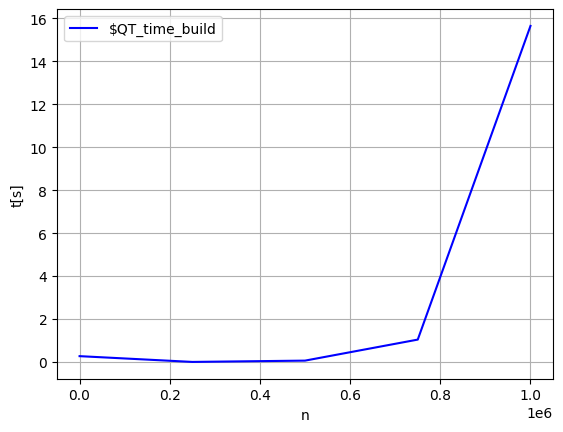

In [38]:
plt.plot(t1, x1, 'blue', label=r'$QT_time_build')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.grid()
plt.show()

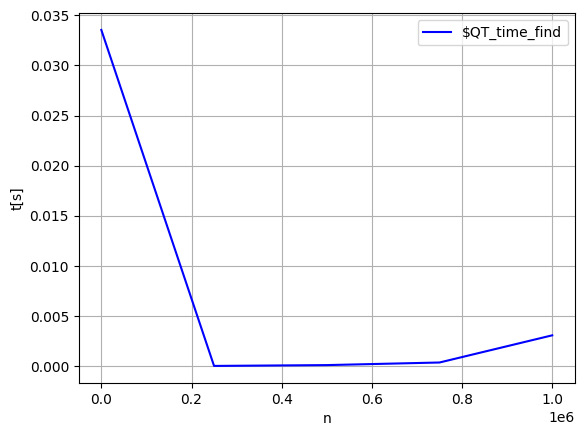

In [41]:
t2 = np.linspace(0,1e6,5)
x2 = np.asarray(QT_time_find)

plt.plot(t2, x2, 'blue', label=r'$QT_time_find')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('t[s]')
plt.grid()
plt.show()